In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
concrete_data = pd.read_excel(r"Concrete_Data.xls")

column_names = concrete_data.columns
concrete_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
concrete_data = concrete_data.to_numpy()

x_train = concrete_data[:-20, :-1]
y_train = concrete_data[:-20, -1].reshape(-1, 1)

print(f"x_train dim : {x_train.shape}")
print(f"y_train dim : {y_train.shape}")

x_train dim : (1010, 8)
y_train dim : (1010, 1)


In [4]:
def cost_function(w, b, x_train, y_train) :
    """calculates the cost for parameters w and b

    Args:
        w (np.ndarray): n x 1 matrix
        b (float): bias
        x_train (np.ndarray): m x n matrix
        y_train (np.ndarray): m x 1 matrix
    """
    m = x_train.shape[0]
    cost = 1 / (2 * m) * np.sum((np.dot(x_train, w) + b - y_train) ** 2)

    return cost

In [5]:
def gradient_descent(x_train, y_train, learning_rate, iterations):
    """calculates the gradient descent for the given data

    Args:
        x_train (np.ndarray): m x n matrix
        y_train (np.ndarray): m x 1 matrix
        learning_rate (float): learning rate
        iterations (int): number of iterations

    Returns:
        np.ndarray: n x 1 matrix
        float: bias
    """
    w = np.zeros(x_train.shape[1]).reshape(x_train.shape[1], -1)
    b = 0.

    m = x_train.shape[0]
    n = x_train.shape[1]

    cost = []
    w_list = np.zeros(iterations * n).reshape(iterations, n) 
    b_list = []
    for i in range(iterations):
        # n x m * m x 1 = n x 1
        w_gradient = (1 / m) * np.dot(
            x_train.T,
            # m x n * n x 1 = m x 1
            (np.dot(x_train, w) + b - y_train)
        )
        b_gradient = 1 / m * np.sum(np.dot(x_train, w) + b - y_train)

        b = b - learning_rate * b_gradient
        w = w - learning_rate * w_gradient

        cost.append(cost_function(w, b, x_train, y_train))
        b_list.append(b)
        
    return w, b, cost, w_list

In [6]:
def predict(w, b, x):
    """predicts the output for the given input

    Args:
        w (np.ndarray): n x 1 matrix
        b (float): bias
        x (np.ndarray): m x n matrix

    Returns:
        np.ndarray: m x 1 matrix
    """

    return np.dot(x, w) + b

In [7]:
w, b, cost_iterations, weight = gradient_descent(x_train, y_train, 0.000001, 1000)

x_test = concrete_data[-20:, :-1]
y_test = concrete_data[-20:, -1].reshape(-1, 1)

y_pred = predict(w, b, x_test)
y_pred = y_pred - y_test

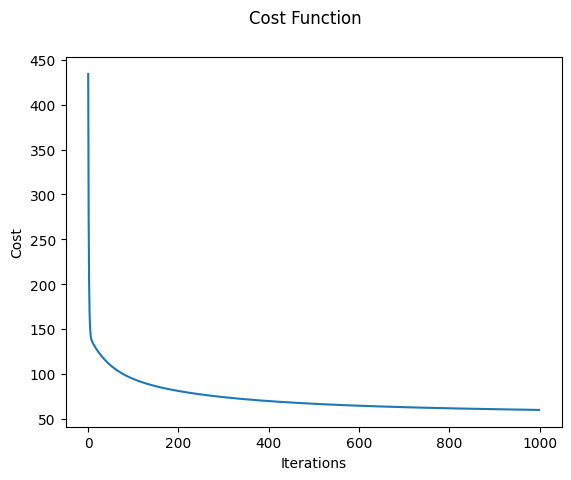

In [8]:
fig, ax = plt.subplots()
ax.plot(cost_iterations)
fig.suptitle('Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
plt.show()

for i in range(weight.shape[1]) :
    ax.plot(weight[:, i], label=f"w{i}")
plt.show()